In [496]:
import numpy as np

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)



<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

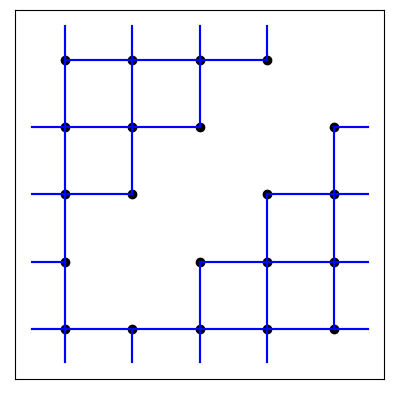

In [497]:
# Create an instance of the diagonally striped lattice
N=5

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, kind='dDSL')
 
import matplotlib.pyplot as plt

#lat.plot_lattice();
lat.plot_nn();

In [498]:
lat.nn

{(4, 0): {(0, 0): [(1, 0)], (4, 1): [(0, 0)], (3, 0): [(0, 0)]},
 (3, 4): {(3, 0): [(0, 1)], (2, 4): [(0, 0)]},
 (4, 3): {(0, 3): [(1, 0)], (4, 2): [(0, 0)]},
 (3, 1): {(4, 1): [(0, 0)],
  (3, 2): [(0, 0)],
  (2, 1): [(0, 0)],
  (3, 0): [(0, 0)]},
 (0, 2): {(1, 2): [(0, 0)],
  (0, 3): [(0, 0)],
  (4, 2): [(-1, 0)],
  (0, 1): [(0, 0)]},
 (1, 0): {(2, 0): [(0, 0)], (0, 0): [(0, 0)], (1, 4): [(0, -1)]},
 (1, 3): {(2, 3): [(0, 0)],
  (1, 4): [(0, 0)],
  (0, 3): [(0, 0)],
  (1, 2): [(0, 0)]},
 (4, 2): {(0, 2): [(1, 0)],
  (4, 3): [(0, 0)],
  (3, 2): [(0, 0)],
  (4, 1): [(0, 0)]},
 (3, 0): {(4, 0): [(0, 0)],
  (3, 1): [(0, 0)],
  (2, 0): [(0, 0)],
  (3, 4): [(0, -1)]},
 (0, 1): {(0, 2): [(0, 0)], (4, 1): [(-1, 0)], (0, 0): [(0, 0)]},
 (2, 4): {(3, 4): [(0, 0)],
  (2, 0): [(0, 1)],
  (1, 4): [(0, 0)],
  (2, 3): [(0, 0)]},
 (1, 2): {(1, 3): [(0, 0)], (0, 2): [(0, 0)]},
 (0, 4): {(1, 4): [(0, 0)], (0, 0): [(0, 1)], (0, 3): [(0, 0)]},
 (2, 1): {(3, 1): [(0, 0)], (2, 0): [(0, 0)]},
 (3, 2): {(4, 

In [499]:
k=np.linspace(0,np.pi, 100)

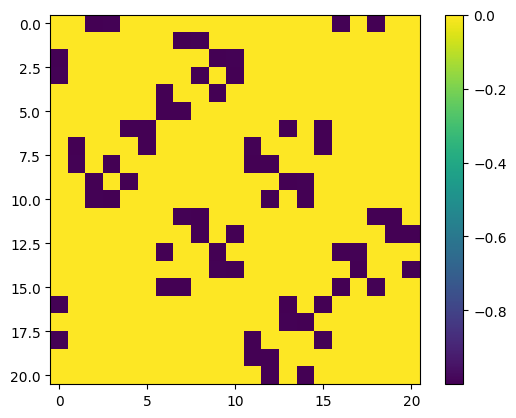

In [500]:
plt.imshow(np.real(ham.Hk(k[2], k[2])[1]))
plt.colorbar()

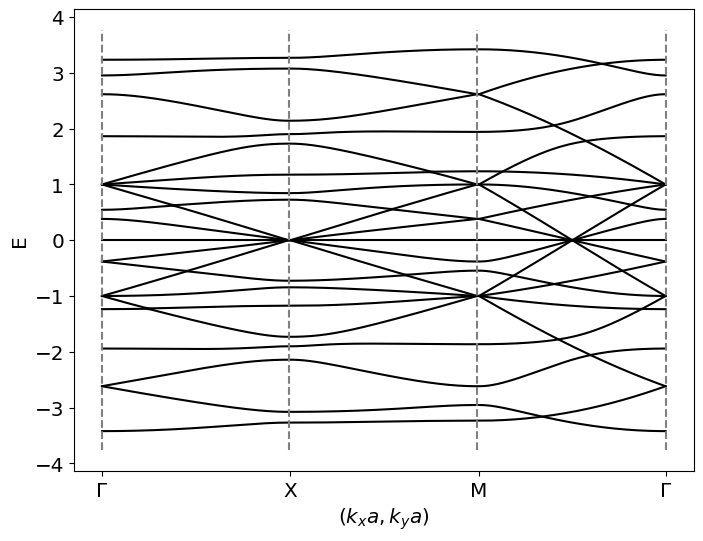

In [501]:
ham.plot_particle_bands(k)

In [502]:
k=np.linspace(0,2*np.pi, 50)
xarr = []
yarr = []
for i in k:
    for j in k:
        xarr.append(i)
        yarr.append(j)
np.shape(xarr)

(2500,)

In [503]:
E=ham.Es(k)

In [504]:
l=np.shape(k)[0]
l2 = np.shape(E)[0]
l2

21

In [505]:
E2=E.reshape(l2,l+1,l)[:,:0:-1,:]
E3 = E2.reshape(l2,l**2)

In [506]:
xticks = [0,l/2-1, l-1]
xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']
#xlabels = [r'-$\pi$',0, r'$\pi$']

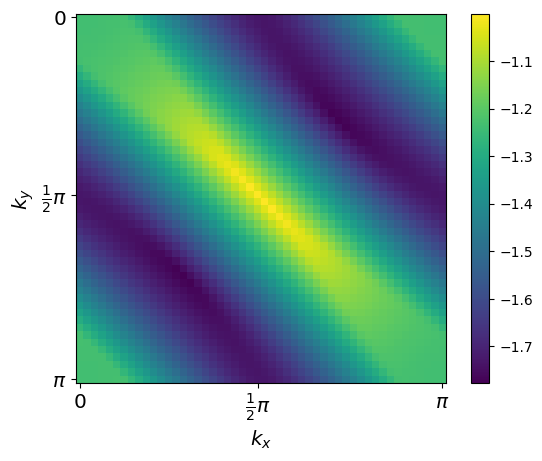

In [507]:
#plt.title('min ($E_{g,m}-E_{g,m+1}$)', size='x-large')
plt.xlabel(r'$k_x$', size='x-large')
plt.ylabel(r'$k_y$', size='x-large')
plt.xticks(ticks=xticks, labels= xlabels, size='x-large')
plt.yticks(ticks=xticks, labels=xlabels, size='x-large')

plt.imshow(E2[4])
plt.colorbar()

In [508]:
c=0
A = []
for i in E2:
    s=np.shape(np.abs(i)[np.abs(i)>1e-10])[0]
    A.append(s)
    if s==0:
        c+=1
c

1

In [509]:
x = np.outer(np.linspace(0, 2*np.pi, 50), np.ones(50))
y = x.copy().T

In [510]:
xticks = [0,1/2*np.pi, np.pi]
xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']
xticks = [0,1/2*np.pi, np.pi]
xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']

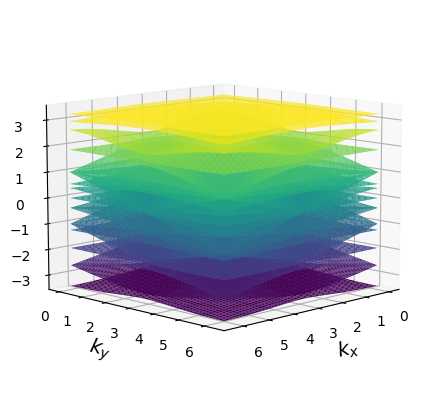

In [517]:
fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(projection='3d')
ax.set_xlabel(r'$k_x$', size='x-large')
ax.set_ylabel(r'$k_y$', size='x-large')
ax.set_zlabel(r'E', size='x-large')
#ax.set_xticks(ticks=xticks, labels= xlabels, size='x-large')
#ax.set_yticks(ticks=xticks, labels=xlabels, size='x-large')


for i in E2:
    surf = ax.plot_surface(x,y, i, vmin=-emax, vmax=emax, cmap='viridis')
#fig.colorbar(surf)
ax.view_init(elev=10, azim=45, roll=0)

In [512]:
Earr = np.linspace(-4,4,20)

In [518]:
DOS = np.zeros(20)
for i in range(l2):
    DOS+=ham.DOS(Earr,k, b=i)

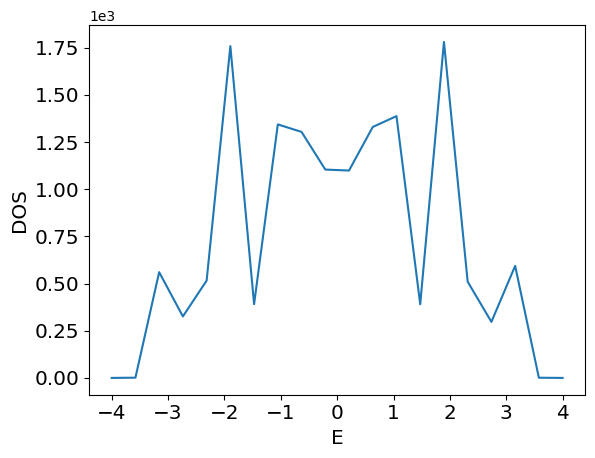

In [519]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.xlim(-0.6, 0.6)
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.show()